In [9]:
%matplotlib inline
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime
import json
import collections

In [86]:
def get_entry_spread_probability_df():
    ticker_list = []
    for day in range(19,26):
        with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
            data_json = json.load(data_file)
            ticker_log = collections.OrderedDict(sorted(data_json.items()))
        
        for key, ticker in ticker_log.items():

            one_list = []
            one_line = [
            key,
            ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
            ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
            ]
            ticker_list.append(one_line)
    column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
    df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

    df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
    df_market_spread.index = df_market_spread.Date
    # df_market_spread.head()

    return df_market_spread

In [87]:
df=get_entry_spread_probability_df()

In [125]:
def print_entry_spread_probability(df, column_name):
    # df=get_entry_spread_probability_df()
    df_last_3days=df[(df['Date']>"2017-10-25") & (df['Date']<"2017-10-27")]
    df_last_3days[column_name].hist(bins=100,range=(-2000, 6000))
    # entryスプレッドがi円以上になる確率
    for i in range(0,5000,500):
        print(str(i)+"円",(len(df_last_3days[df_last_3days[column_name]>i]) / len(df_last_3days))* 100) 

0円 99.53630100688923
500円 97.4827768945416
1000円 89.28192898781134
1500円 75.98039215686273
2000円 54.22628510863805
2500円 33.33333333333333
3000円 21.250662427133015
3500円 12.51987281399046
4000円 5.233174350821409
4500円 0.6359300476947536


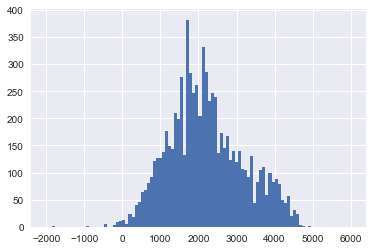

In [126]:
print_entry_spread_probability(df,"quoine_bid-coincheck_ask")

In [131]:
def print_exit_spread_probability(df, column_name):
    # df=get_entry_spread_probability_df()
    df_last_3days=df[(df['Date']>"2017-10-25") & (df['Date']<"2017-10-27")]
    df_last_3days[column_name].hist(bins=100,range=(-6000, 2000))
    # exitスプレッドがi円以上になる確率
    for i in range(-5000,500,500):
        print(str(i)+"円",(len(df_last_3days[df_last_3days[column_name]>i]) / len(df_last_3days))* 100) 

-5000円 97.35029146793853
-4500円 91.60042395336512
-4000円 82.7371489136195
-3500円 72.65500794912559
-3000円 56.24006359300478
-2500円 34.870164281928986
-2000円 18.627450980392158
-1500円 5.908850026497086
-1000円 0.9009009009009009
-500円 0.22522522522522523
0円 0.013248542660307366


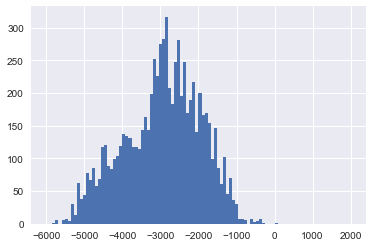

In [132]:
print_exit_spread_probability(df,"coincheck_bid-quoine_ask")

In [106]:
# 時系列
def spread_time_series_plot(day):
    with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
        data_json = json.load(data_file)
        ticker_log = collections.OrderedDict(sorted(data_json.items()))
    ticker_list = []
    for key, ticker in ticker_log.items():

        one_list = []
        one_line = [
        key,
        ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
        ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
        ]
        ticker_list.append(one_line)
    column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
    df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

    df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
    df_market_spread.index = df_market_spread.Date
    # df_market_spread.head()

    plt.figure()#初期化
    ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-10000,10000])
    ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-10000,10000])

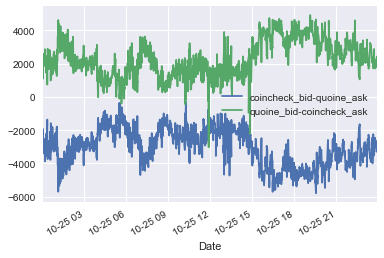

In [38]:
spread_time_series_plot(25)

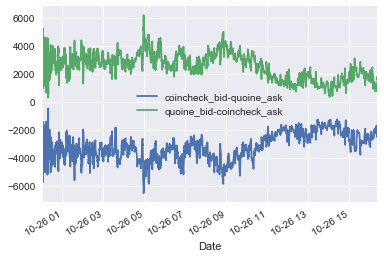

In [104]:
spread_time_series_plot(26)

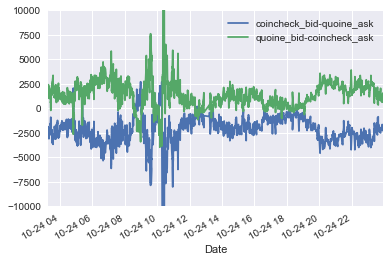

In [109]:
day=24
with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))
ticker_list = []
for key, ticker in ticker_log.items():

    one_list = []
    one_line = [
    key,
    ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
    ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
    ]
    ticker_list.append(one_line)
column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date

df_market_spread=df_market_spread[(df_market_spread['Date']>"2017-10-24 00:00:00") & (df_market_spread['Date']<"2017-10-24 23:59:59")]

# df_market_spread.head()

plt.figure()#初期化
ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-10000,10000])
ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-10000,10000])

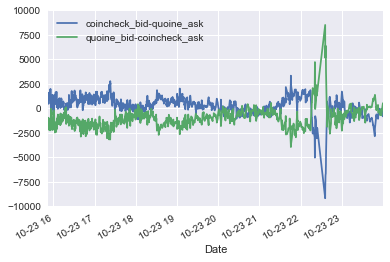

In [112]:
day=24
with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))
ticker_list = []
for key, ticker in ticker_log.items():

    one_list = []
    one_line = [
    key,
    ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
    ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
    ]
    ticker_list.append(one_line)
column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date

df_market_spread=df_market_spread[(df_market_spread['Date']>"2017-10-23 00:00:00") & (df_market_spread['Date']<"2017-10-23 23:59:59")]

# df_market_spread.head()

plt.figure()#初期化
ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-10000,10000])
ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-10000,10000])

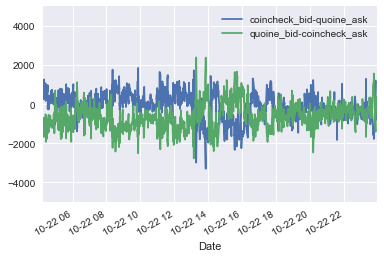

In [114]:
day=24
with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))
ticker_list = []
for key, ticker in ticker_log.items():

    one_list = []
    one_line = [
    key,
    ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
    ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
    ]
    ticker_list.append(one_line)
column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date

df_market_spread=df_market_spread[(df_market_spread['Date']>"2017-10-22 00:00:00") & (df_market_spread['Date']<"2017-10-22 23:59:59")]

# df_market_spread.head()

plt.figure()#初期化
ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-5000,5000])
ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-5000,5000])

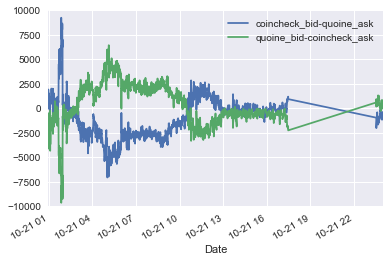

In [117]:
day=24
with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))
ticker_list = []
for key, ticker in ticker_log.items():

    one_list = []
    one_line = [
    key,
    ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
    ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
    ]
    ticker_list.append(one_line)
column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date

df_market_spread=df_market_spread[(df_market_spread['Date']>"2017-10-21 00:00:00") & (df_market_spread['Date']<"2017-10-21 23:59:59")]

# df_market_spread.head()

plt.figure()#初期化
ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-10000,10000])
ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-10000,10000])

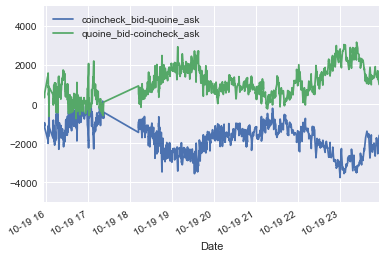

In [123]:
day=19
with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))
ticker_list = []
for key, ticker in ticker_log.items():

    one_list = []
    one_line = [
    key,
    ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
    ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
    ]
    ticker_list.append(one_line)
column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date

#df_market_spread=df_market_spread[(df_market_spread['Date']>"2017-10-20 00:00:00") & (df_market_spread['Date']<"2017-10-20 23:59:59")]

# df_market_spread.head()

plt.figure()#初期化
ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-5000,5000])
ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-5000,5000])

In [124]:
day=18
with open("simulation_data/2017-10-"+str(day)+"ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))
ticker_list = []
for key, ticker in ticker_log.items():

    one_list = []
    one_line = [
    key,
    ticker["coincheck"]["bid"] - ticker["quoine"]["ask"],
    ticker["quoine"]["bid"] - ticker["coincheck"]["ask"],
    ]
    ticker_list.append(one_line)
column_name = ["Date","coincheck_bid-quoine_ask","quoine_bid-coincheck_ask"]
df_market_spread=pd.DataFrame(ticker_list, columns=column_name)

df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date

#df_market_spread=df_market_spread[(df_market_spread['Date']>"2017-10-20 00:00:00") & (df_market_spread['Date']<"2017-10-20 23:59:59")]

# df_market_spread.head()

plt.figure()#初期化
ax = df_market_spread["coincheck_bid-quoine_ask"].plot(legend=True,ylim=[-5000,5000])
ax = df_market_spread["quoine_bid-coincheck_ask"].plot(legend=True,ylim=[-5000,5000])

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_data/2017-10-18ticker_log.json'